In [1]:
### Load Pacakages and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:

train_data=pd.read_csv('/Users/sudhi/Desktop/ Externship/ml_case_training_data.csv')
churn_data=pd.read_csv('/Users/sudhi/Desktop/ Externship/ml_case_training_output.csv')
history_data= pd.read_csv('/Users/sudhi/Desktop/ Externship/ml_case_training_hist_data.csv')

In [4]:
train_data.head(2)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648


In [5]:
churn_data.head(2)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1


In [6]:
history_data.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [7]:
train=pd.merge(train_data, churn_data, on='id')

In [8]:
train.head(2)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [10]:
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [12]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [13]:
# -ve values indicate data is corropted 

In [14]:
#missing values
pd.DataFrame({'missing values %': train.isnull().sum()/len(train.index) *100})

,missing values %
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [15]:
#missing values
pd.DataFrame({'missing values %': history_data.isnull().sum()/len(history_data.index) *100})

,missing values %
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


As we can see that some of columns have missing data over 50%, we need to clean them in the later

In [16]:
churn= train[['id', 'churn']]

In [17]:
churn.columns=['Companies', 'churn']

In [18]:
churn

,Companies,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [19]:
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

In [20]:
churn_percentage
# About 10% of total customers have chruned

,Companies
churn,
0,90.090706
1,9.909294


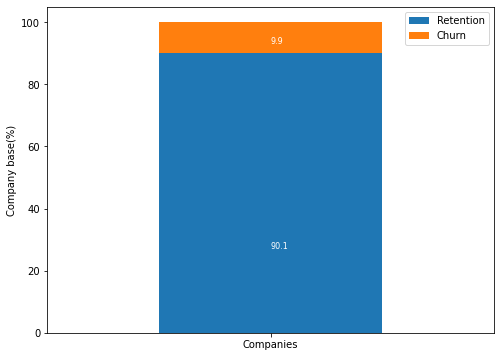

In [21]:
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(8))
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [22]:
#Next see the acitivity distribution
activity=train[['id','activity_new','churn']]
activity=activity.groupby([activity['activity_new'],
                           activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)

In [23]:
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


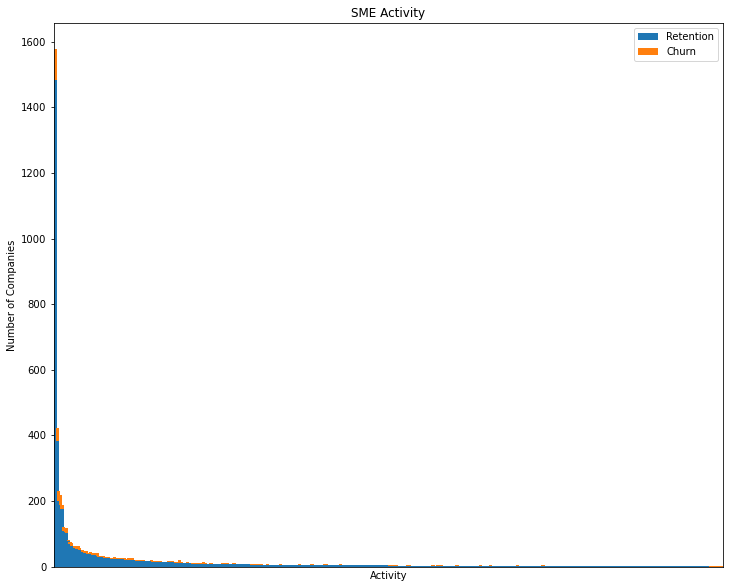

In [24]:
activity.plot(kind='bar',figsize=(12,10),width=2,stacked=True,title="SME Activity")
plt.ylabel("Number of Companies")
plt.xlabel('Activity')
plt.legend(['Retention','Churn'],loc="upper right")
plt.xticks([])
plt.show()
# The xticks is not showing to facilitate the visualization 
# distribution of the classes despite the lack of 60% of the entries

In [25]:
#looking values percentage wise
activity_total=activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage=activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({'Percentage churn':activity_percentage,
             'Total companies':activity_total}).sort_values(by='Percentage churn',ascending=False).head()

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.0,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.0,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.0,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.0,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.0,2.0


In [26]:
#Now is about Sales channel
channel=train[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [27]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

In [28]:
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


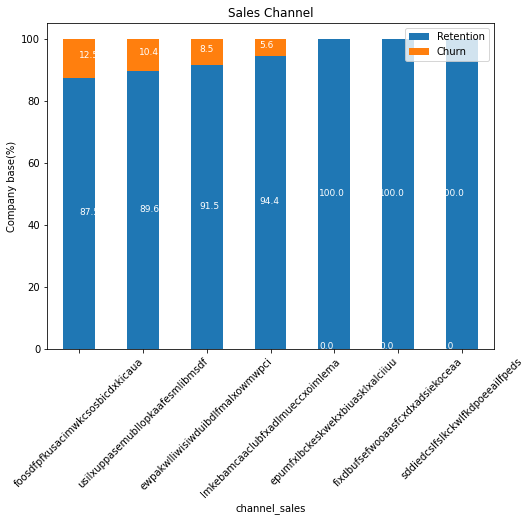

In [29]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(9))
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [30]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage":channel_percentage,
             "Total companies":channel_total}).sort_values(by='Churn percentage',ascending=False).head()

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0


In [31]:
#Next is the consumption
consumption=train[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]

In [32]:
consumption

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.80,f,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,t,0
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,f,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,f,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,f,0


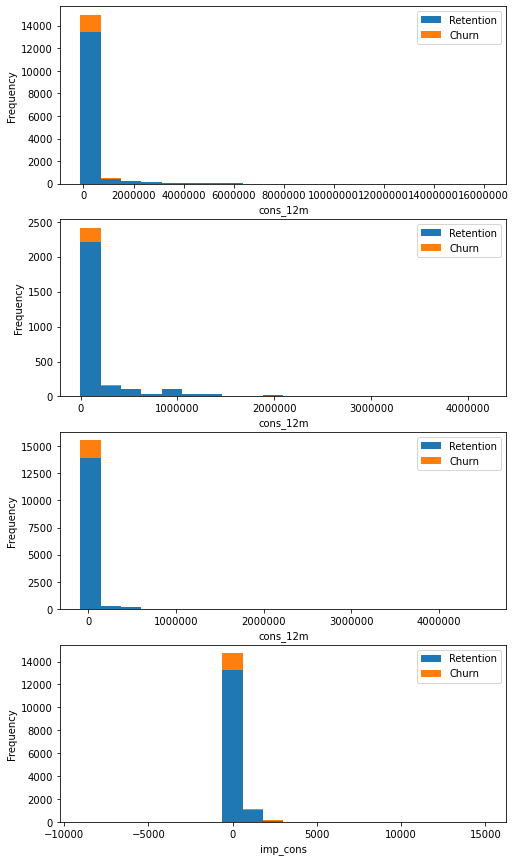

In [33]:
fig,axs=plt.subplots(nrows=4,figsize=(8,15))
#create a dataframe with data to plot
cons_12m=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_12m'],
                      'Churn':consumption[consumption['churn']==1]['cons_12m']})
#plot histogram
cons_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[0],stacked=True);
# X-axis label
axs[0].set_xlabel('cons_12m')
#change x-axis to plain style
axs[0].ticklabel_format(style='plain',axis='x')



#create a dataframe with data to plot
cons_gas_12m=pd.DataFrame({'Retention':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=="t"]['churn']==0]['cons_gas_12m'],
                      'Churn':consumption[consumption['has_gas']=='t'][consumption[consumption['has_gas']=='t']['churn']==1]['cons_gas_12m']})
#plot histogram
cons_gas_12m[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[1],stacked=True);
# X-axis label
axs[1].set_xlabel('cons_12m')
#change x-axis to plain style
axs[1].ticklabel_format(style='plain',axis='x')



#create a dataframe with data to plot
cons_last_month=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['cons_last_month'],
                      'Churn':consumption[consumption['churn']==1]['cons_last_month']})
#plot histogram
cons_last_month[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[2],stacked=True);
# X-axis label
axs[2].set_xlabel('cons_12m')
#change x-axis to plain style
axs[2].ticklabel_format(style='plain',axis='x')



#create a dataframe with data to plot
imp_cons=pd.DataFrame({'Retention':consumption[consumption['churn']==0]['imp_cons'],
                      'Churn':consumption[consumption['churn']==1]['imp_cons']})
#plot histogram
imp_cons[['Retention','Churn']].plot(kind='hist',bins=20,ax=axs[3],stacked=True);
# X-axis label
axs[3].set_xlabel('imp_cons')
#change x-axis to plain style
axs[3].ticklabel_format(style='plain',axis='x')

In [34]:
#The distribution of the consumptions is highly right skewed and has a long tail
#we need to check the outliers by use boxplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

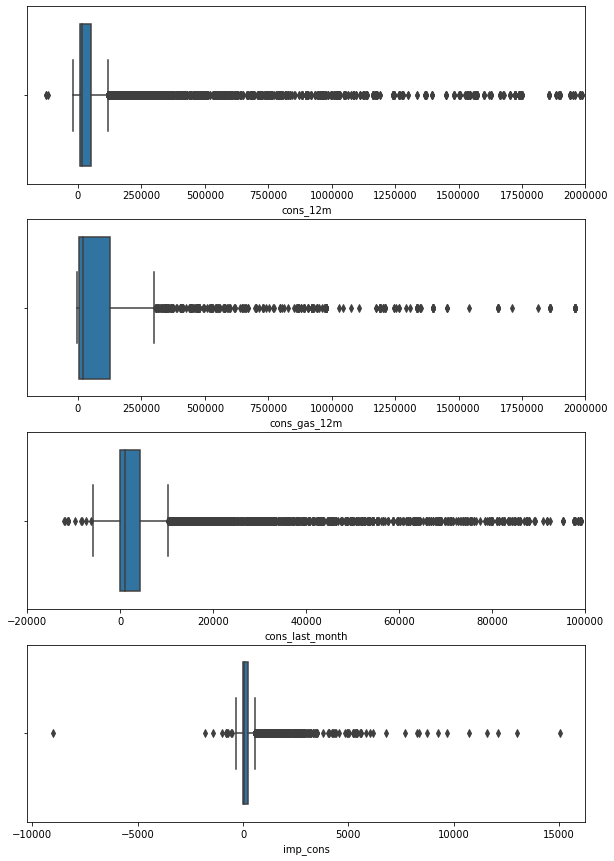

In [35]:
ig,axs=plt.subplots(nrows=4,figsize=(10,15))
sns.boxplot(consumption['cons_12m'],ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(consumption['cons_last_month'],ax=axs[2])
sns.boxplot(consumption['imp_cons'],ax=axs[3])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
axs[0].set_xlim(-200000,2000000)
axs[1].set_xlim(-200000,2000000)
axs[2].set_xlim(-20000,100000)
plt.show();

In [36]:
#we will deal with the outliers in the data cleaning

In [37]:
#chanhing the datatype of Dates
dates=train[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal']=pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

In [38]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month=label.month_name()[:1]
    if label.month_name()=="January":
        month+=f'\n{label.year}'
    return month

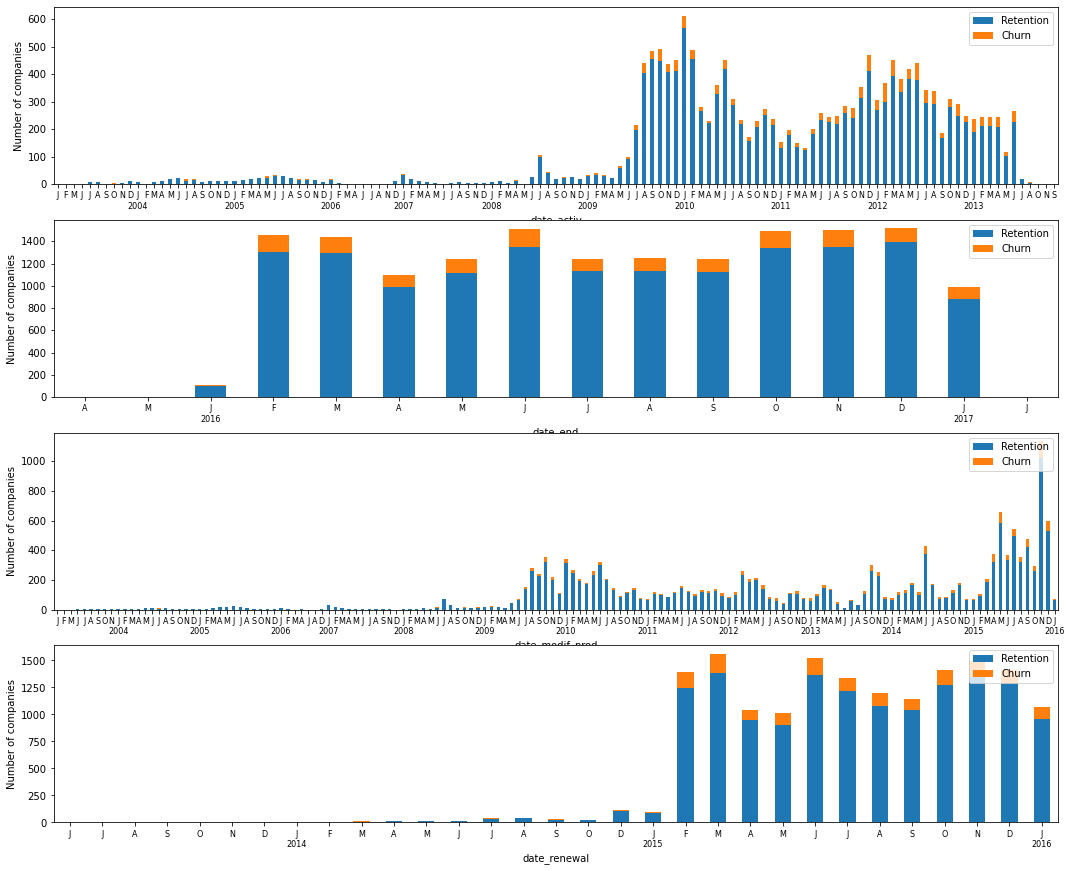

In [39]:
fig,axs=plt.subplots(nrows=4,figsize=(18,15))
date_activ=dates[['date_activ','churn','id']].set_index('date_activ').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_activ.plot(kind='bar',stacked=True,rot=0,ax=axs[0])
axs[0].set_xticklabels(map(lambda x:line_format(x),date_activ.index),fontsize=8)
axs[0].set_ylabel("Number of companies")
axs[0].legend(['Retention','Churn'],loc='upper right')


date_end=dates[['date_end','churn','id']].set_index('date_end').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_end.plot(kind='bar',stacked=True,rot=0,ax=axs[1])
axs[1].set_xticklabels(map(lambda x:line_format(x),date_end.index),fontsize=8)
axs[1].set_ylabel("Number of companies")
axs[1].legend(['Retention','Churn'],loc='upper right')


date_modif_prod=dates[['date_modif_prod','churn','id']].set_index('date_modif_prod').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_modif_prod.plot(kind='bar',stacked=True,rot=0,ax=axs[2])
axs[2].set_xticklabels(map(lambda x:line_format(x),date_modif_prod.index),fontsize=8)
axs[2].set_ylabel("Number of companies")
axs[2].legend(['Retention','Churn'],loc='upper right')


date_renewal=dates[['date_renewal','churn','id']].set_index('date_renewal').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_renewal.plot(kind='bar',stacked=True,rot=0,ax=axs[3])
axs[3].set_xticklabels(map(lambda x:line_format(x),date_renewal.index),fontsize=8)
axs[3].set_ylabel("Number of companies")
axs[3].legend(['Retention','Churn'],loc='upper right');

In [40]:
#Now is about the forecast
forecast=train[['id','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons',
                'forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_energy_p2','forecast_price_pow_p1','churn']]

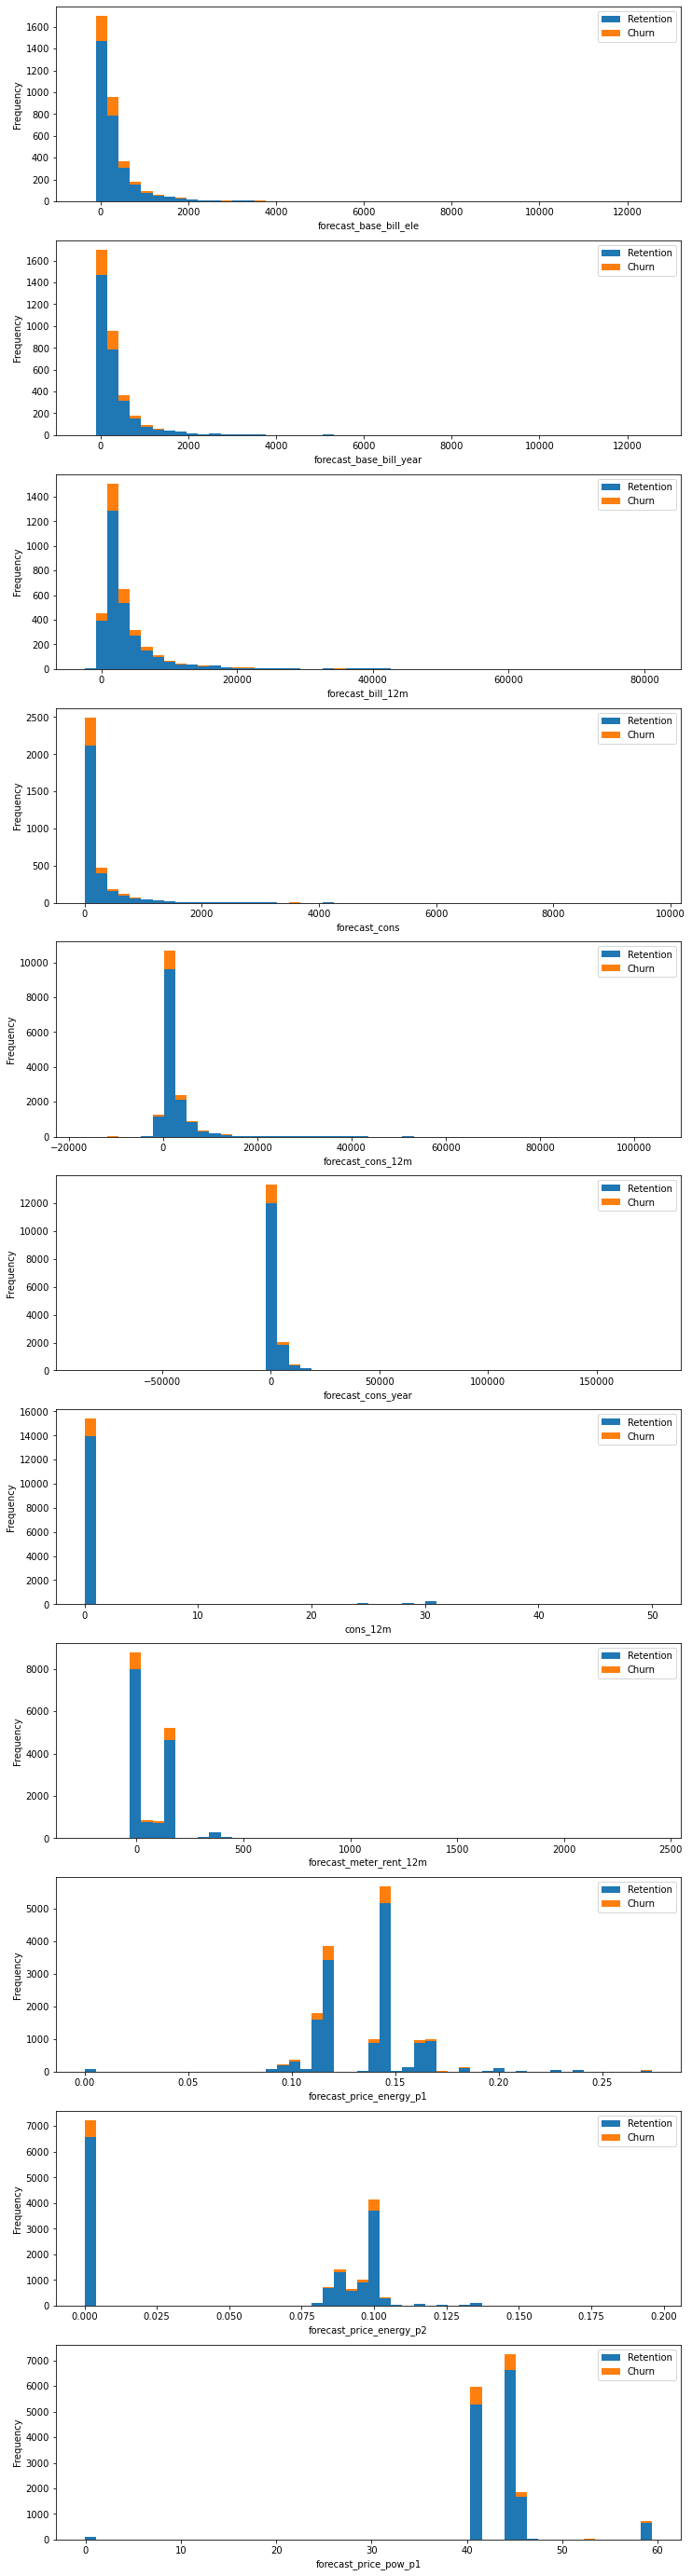

In [41]:
fig,axs=plt.subplots(nrows=11,figsize=(12,50))

forecast_base_bill_ele=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_base_bill_ele'],
                      'Churn':train[train['churn']==1]['forecast_base_bill_ele']})
forecast_base_bill_ele[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[0],stacked=True);
axs[0].set_xlabel('forecast_base_bill_ele')
axs[0].ticklabel_format(style='plain',axis='x')


forecast_base_bill_year=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_base_bill_year'],
                      'Churn':train[train['churn']==1]['forecast_base_bill_year']})
forecast_base_bill_year[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[1],stacked=True);
axs[1].set_xlabel('forecast_base_bill_year')
axs[1].ticklabel_format(style='plain',axis='x')


forecast_bill_12m=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_bill_12m'],
                      'Churn':train[train['churn']==1]['forecast_bill_12m']})
forecast_bill_12m[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[2],stacked=True);
axs[2].set_xlabel('forecast_bill_12m')
axs[2].ticklabel_format(style='plain',axis='x')


forecast_cons=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_cons'],
                      'Churn':train[train['churn']==1]['forecast_cons']})
forecast_cons[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[3],stacked=True);
axs[3].set_xlabel('forecast_cons')
axs[3].ticklabel_format(style='plain',axis='x')


forecast_cons_12m=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_cons_12m'],
                      'Churn':train[train['churn']==1]['forecast_cons_12m']})
forecast_cons_12m[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[4],stacked=True);
axs[4].set_xlabel('forecast_cons_12m')
axs[4].ticklabel_format(style='plain',axis='x')


forecast_cons_year=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_cons_year'],
                      'Churn':train[train['churn']==1]['forecast_cons_year']})
forecast_cons_year[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[5],stacked=True);
axs[5].set_xlabel('forecast_cons_year')
axs[5].ticklabel_format(style='plain',axis='x')


forecast_discount_energy=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_discount_energy'],
                      'Churn':train[train['churn']==1]['forecast_discount_energy']})
forecast_discount_energy[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[6],stacked=True);
axs[6].set_xlabel('cons_12m')
axs[6].ticklabel_format(style='plain',axis='x')


forecast_meter_rent_12m=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_meter_rent_12m'],
                      'Churn':train[train['churn']==1]['forecast_meter_rent_12m']})
forecast_meter_rent_12m[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[7],stacked=True);
axs[7].set_xlabel('forecast_meter_rent_12m')
axs[7].ticklabel_format(style='plain',axis='x')


forecast_price_energy_p1=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_energy_p1'],
                      'Churn':train[train['churn']==1]['forecast_price_energy_p1']})
forecast_price_energy_p1[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[8],stacked=True);
axs[8].set_xlabel('forecast_price_energy_p1')
axs[8].ticklabel_format(style='plain',axis='x')


forecast_price_energy_p2=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_energy_p2'],
                      'Churn':train[train['churn']==1]['forecast_price_energy_p2']})
forecast_price_energy_p2[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[9],stacked=True);
axs[9].set_xlabel('forecast_price_energy_p2')
axs[9].ticklabel_format(style='plain',axis='x')


forecast_price_pow_p1=pd.DataFrame({'Retention':train[train['churn']==0]['forecast_price_pow_p1'],
                      'Churn':train[train['churn']==1]['forecast_price_pow_p1']})
forecast_price_pow_p1[['Retention','Churn']].plot(kind='hist',bins=50,ax=axs[10],stacked=True);
axs[10].set_xlabel('forecast_price_pow_p1')
axs[10].ticklabel_format(style='plain',axis='x')


In [42]:
# similarily to the consumption plots, that lots of variables are highly skewed

In [43]:
#Now for the contract type(electricity,gas)
contract_type=train[['id','has_gas','churn']]
contract=contract_type.groupby([contract_type['churn'],
                               contract_type['has_gas']])['id'].count().unstack(level=0)

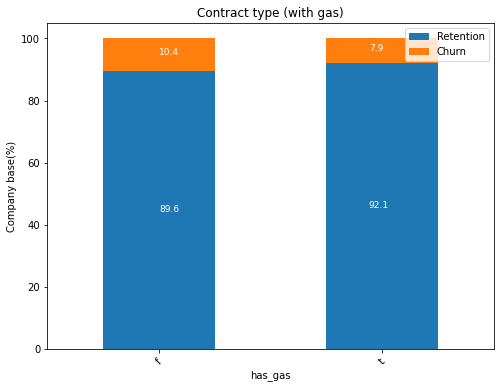

In [44]:
contract_percentage=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(9))
plt.title('Contract type (with gas)')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [45]:
#Now for Margins
margin=train[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


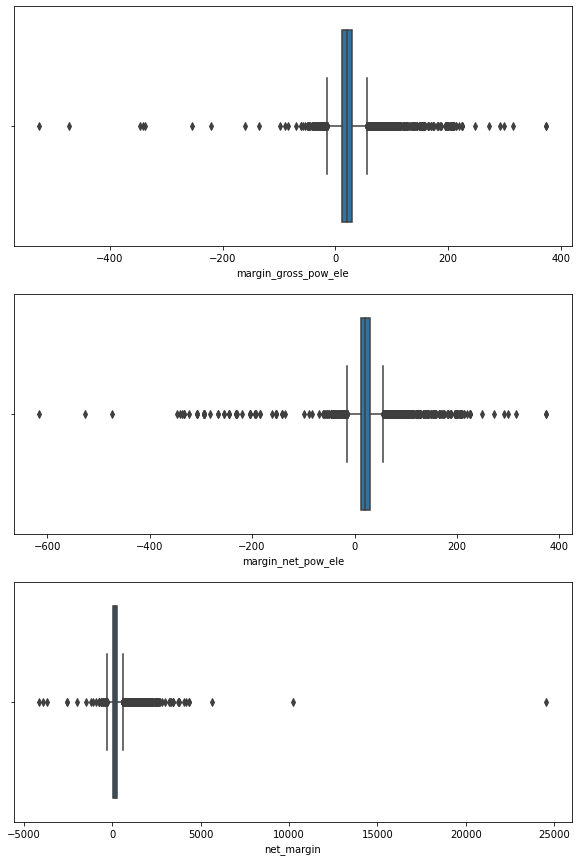

In [46]:
fig,axs=plt.subplots(nrows=3,figsize=(10,15))
sns.boxplot(margin['margin_gross_pow_ele'],ax=axs[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axs[1])
sns.boxplot(margin['net_margin'],ax=axs[2])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
plt.show()

In [47]:
#Next for the Subcribed power
power=train[['id','pow_max','churn']].fillna(0)

<Figure size 432x288 with 0 Axes>

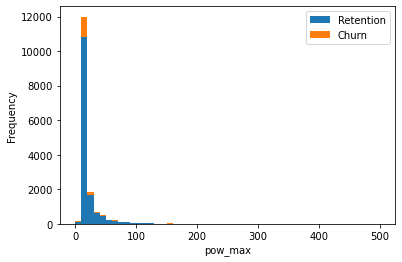

In [48]:
figure=plt.figure()
pow_max=pd.DataFrame({'Retention':power[power['churn']==0]['pow_max'],
                      'Churn':power[power['churn']==1]['pow_max']})
pow_max[['Retention','Churn']].plot(kind='hist',bins=50,stacked=True);
plt.xlabel('pow_max')
plt.ticklabel_format(style='plain',axis='x');

In [49]:
#Last id for others variables
others=train[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

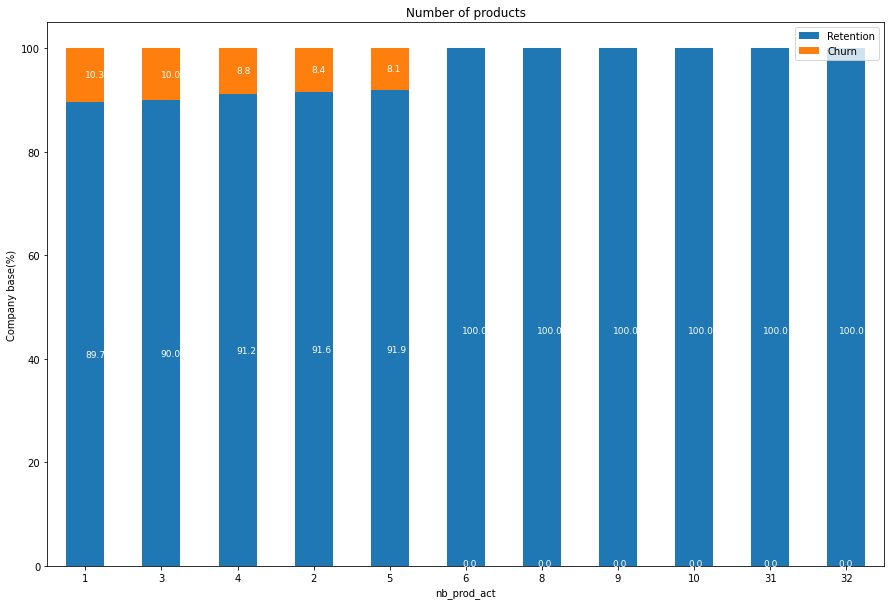

In [50]:
ax=products_percentage.plot(kind='bar',stacked=True,figsize=(15,10),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(9))
plt.title('Number of products')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [51]:
years_antig=others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
years_antig_percentage=(years_antig.div(years_antig.sum(axis=1),axis=0)*100)

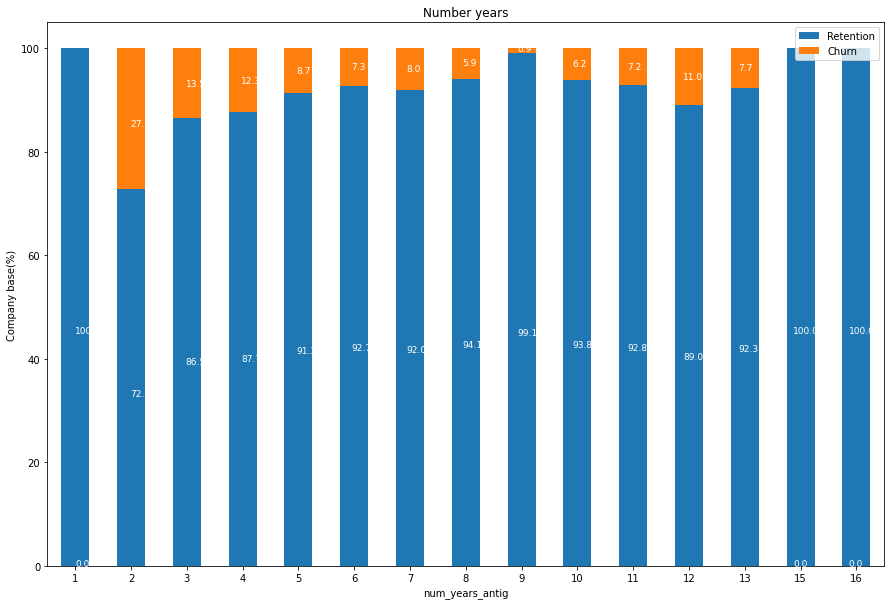

In [52]:
ax=years_antig_percentage.plot(kind='bar',stacked=True,figsize=(15,10),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(9))
plt.title('Number years')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [53]:
origin=others.groupby([others['origin_up'],others['churn']])['id'].count().unstack(level=1)
origin_percentage=(origin.div(origin.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

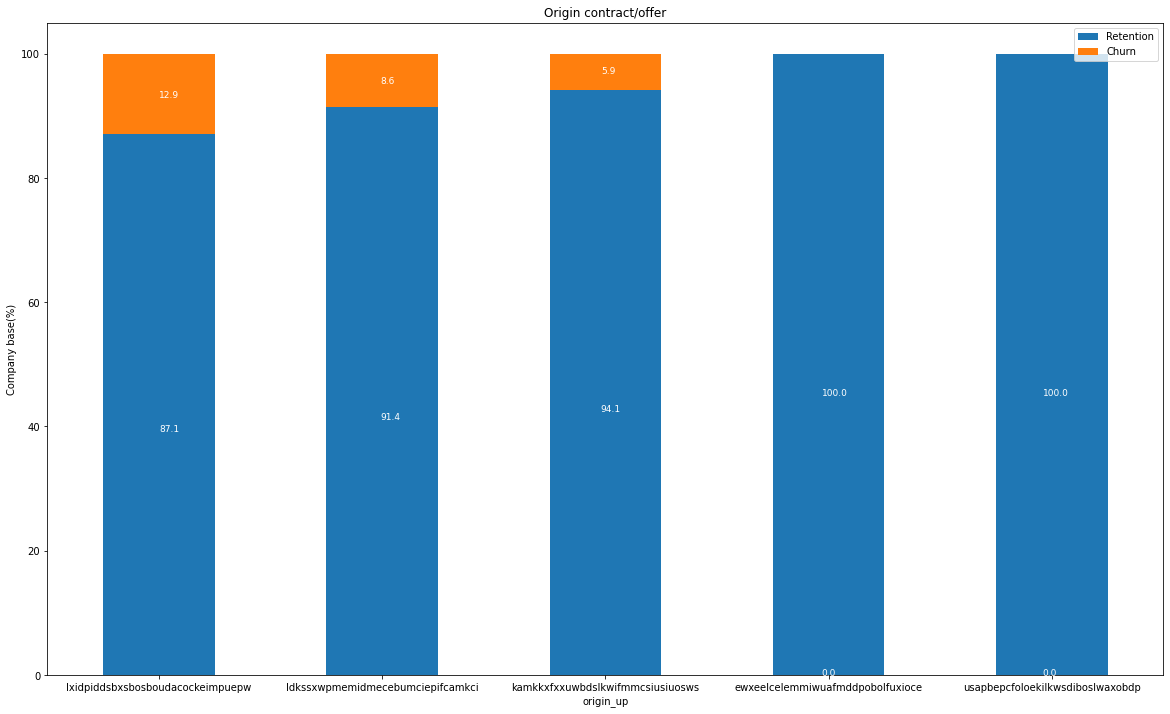

In [54]:
ax=origin_percentage.plot(kind='bar',stacked=True,figsize=(20,12),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(9))
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [55]:
## Data Cleaning 

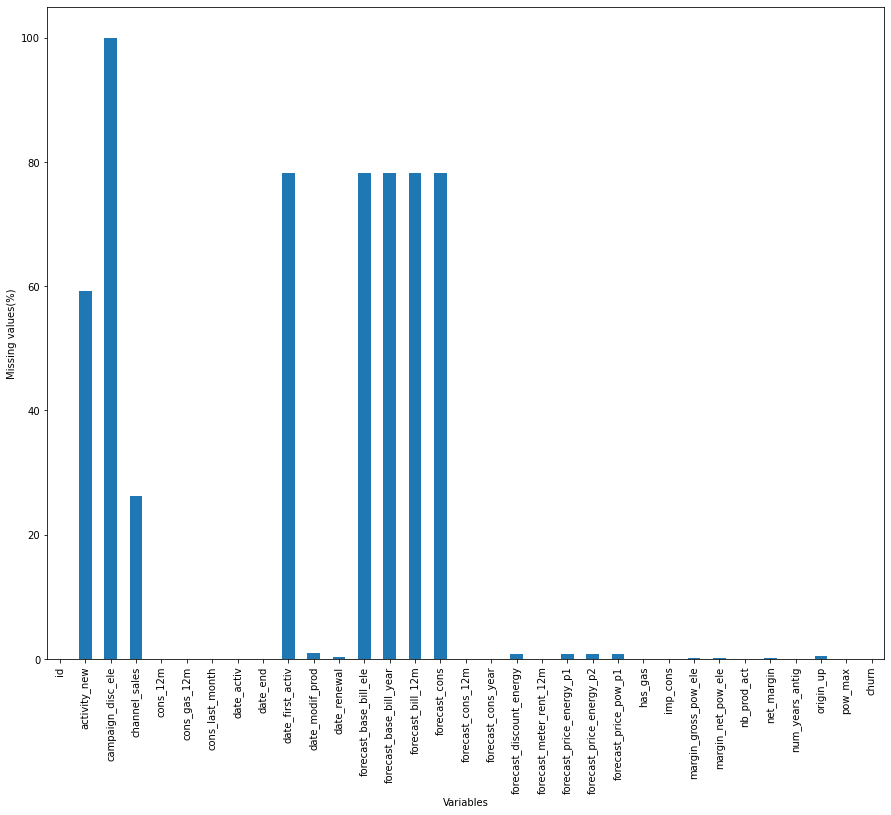

In [56]:
#plot the missing data
plt.figure(figsize=(15,12))
(train.isnull().sum()/len(train.index)*100).plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing values(%)')
plt.show()

In [57]:
train.drop(columns=['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','activity_new'],inplace=True)

In [58]:
#Check The removed dataframe
pd.DataFrame({'Dataframe columns':train.columns})

,Dataframe columns
0,id
1,channel_sales
2,cons_12m
3,cons_gas_12m
4,cons_last_month
5,date_activ
6,date_end
7,date_modif_prod
8,date_renewal
9,forecast_cons_12m


In [59]:
#Check for the duplicates
train[train.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [60]:
#Check the history missing data
missing_data_percentage=history_data.isnull().sum()/len(history_data.index)*100

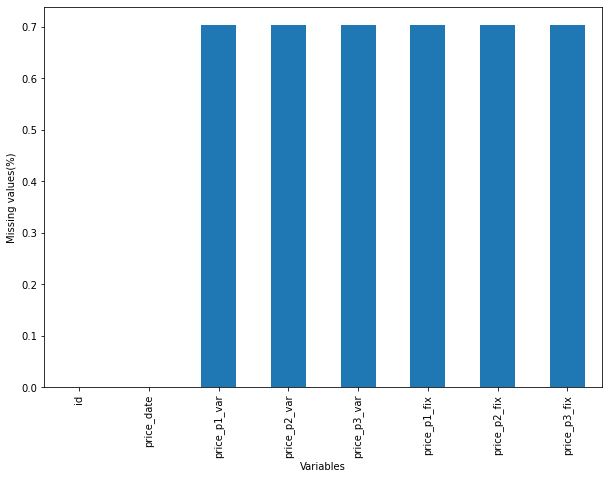

In [61]:
plt.figure(figsize=(10,7))
missing_data_percentage.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing values(%)')
plt.show()

In [62]:
## Formatting the data

In [63]:
#fill the missing date with the median date which use the value_counts()
train.loc[train['date_modif_prod'].isnull(),'date_modif_prod']=train['date_modif_prod'].value_counts().index[0]
train.loc[train['date_end'].isnull(),'date_end']=train['date_end'].value_counts().index[0]
train.loc[train['date_renewal'].isnull(),'date_renewal']=train['date_renewal'].value_counts().index[0]

In [64]:
#fill the price data with median
history_data.loc[history_data['price_p1_var'].isnull(),'price_p1_var']=history_data['price_p1_var'].median()
history_data.loc[history_data['price_p2_var'].isnull(),'price_p2_var']=history_data['price_p2_var'].median()
history_data.loc[history_data['price_p3_var'].isnull(),'price_p3_var']=history_data['price_p3_var'].median()
history_data.loc[history_data['price_p1_fix'].isnull(),'price_p1_fix']=history_data['price_p1_fix'].median()
history_data.loc[history_data['price_p2_fix'].isnull(),'price_p2_fix']=history_data['price_p2_fix'].median()
history_data.loc[history_data['price_p3_fix'].isnull(),'price_p3_fix']=history_data['price_p3_fix'].median()

In [65]:
#fill the negative data of history with median
history_data.loc[history_data['price_p1_fix']<0,'price_p1_fix']=history_data['price_p1_fix'].median()
history_data.loc[history_data['price_p2_fix']<0,'price_p2_fix']=history_data['price_p2_fix'].median()
history_data.loc[history_data['price_p3_fix']<0,'price_p3_fix']=history_data['price_p3_fix'].median()

In [66]:
#Transform date columns to datetime type
train['date_activ']=pd.to_datetime(train['date_activ'],format='%Y-%m-%d')
train['date_end']=pd.to_datetime(train['date_end'],format='%Y-%m-%d')
train['date_modif_prod']=pd.to_datetime(train['date_modif_prod'],format='%Y-%m-%d')
train['date_renewal']=pd.to_datetime(train['date_renewal'],format='%Y-%m-%d')
history_data['price_date']=pd.to_datetime(history_data['price_date'],format='%Y-%m-%d')

In [67]:
#Make directory of processed data
train.to_csv('train_clean.csv', index = False)
history_data.to_csv('history_clean.csv', index = False)